In [41]:
import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

from PIL import Image
from pathlib import Path
from ddm.image.reader import read_frame, read_experiment
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

experiment_path = Path("..") / "data" / "1C01"



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
stack = read_experiment(experiment_path)



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

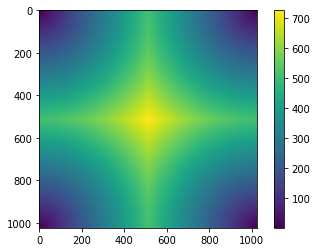

In [72]:
frame_size = stack[0].size[0]
max_tau = len(stack) // 2
max_q = frame_size // 2
N_couple_frames_to_average = 100

jj = np.tile(range(0, frame_size), (frame_size, 1))
ii = jj.T
cc = max_q + 1

temp_arr = np.sqrt((ii - cc) * (ii - cc) + (jj - cc) * (jj - cc) )
# Fourier shift zero-frequencies into centre of spectrum
distance_map = np.fft.fftshift(np.round(temp_arr) + 1)

im = plt.imshow(distance_map, interpolation='none')
cbar = plt.colorbar(im)

# https://stackoverflow.com/questions/19201972/can-numpy-bincount-work-with-2d-arrays
def bincount2d(arr, bins=None):
    if bins is None:
        bins = int(np.max(arr)) + 1
    count = np.zeros(shape=[len(arr), bins],
                     dtype=np.float64)
    indexing = np.arange(len(arr))
    for col in arr.T:
        count[indexing, col.astype(int)] += 1.0
    return count

distance_map

dist_counts = bincount2d(distance_map)

iqtau = np.zeros((max_q, max_tau), dtype=np.float64)
accum_abs_ft_diff_image = np.zeros(frame_size, dtype=np.float32)

for tau in range(max_tau):
    ind_frames_1 = np.random.randint(tau)
    ind_frames_2 = np.random.randint(len(stack), 

    for i in range(N_couple_frames_to_average):
